# Task
Analyze the Bank Marketing Dataset to predict personal loan acceptance, exploring features like age, job, and marital status, training a Logistic Regression or Decision Tree classifier, and identifying customer groups likely to accept the offer.

## Load the data

### Subtask:
Load the Bank Marketing Dataset into a pandas DataFrame.


**Reasoning**:
Import the pandas library, load the dataset, and display the head and info of the DataFrame.



In [1]:
import pandas as pd

# Load the dataset, specifying the delimiter
df = pd.read_csv('/content/bank-full.csv', sep=';')

# Display the first few rows and information of the DataFrame
display(df.head())
display(df.info())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


None

## Explore the data

### Subtask:
Perform basic data exploration on features such as age, job, and marital status to understand their distribution and relationship with the target variable ('y').


**Reasoning**:
Analyze the distribution of 'age', 'job', and 'marital' features, and their relationship with the target variable 'y'.



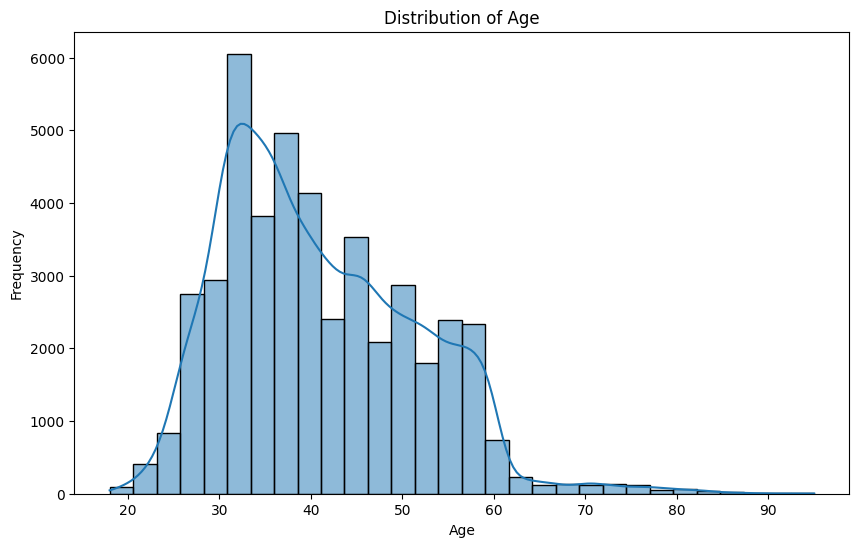

,age
count,45211.000000
mean,40.936210
std,10.618762
min,18.000000
25%,33.000000
50%,39.000000
75%,48.000000
max,95.000000


,count
job,
blue-collar,9732
management,9458
technician,7597
admin.,5171
services,4154
retired,2264
self-employed,1579
entrepreneur,1487
unemployed,1303


,count
marital,
married,27214
single,12790
divorced,5207


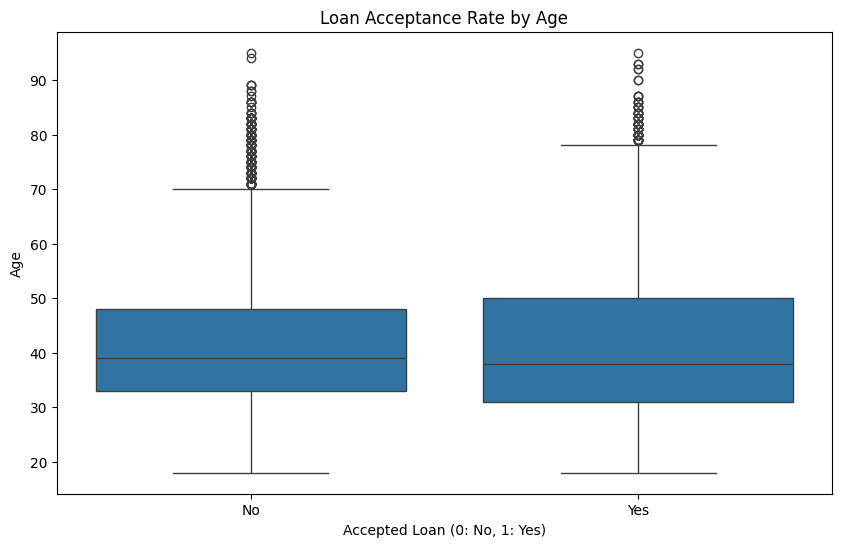

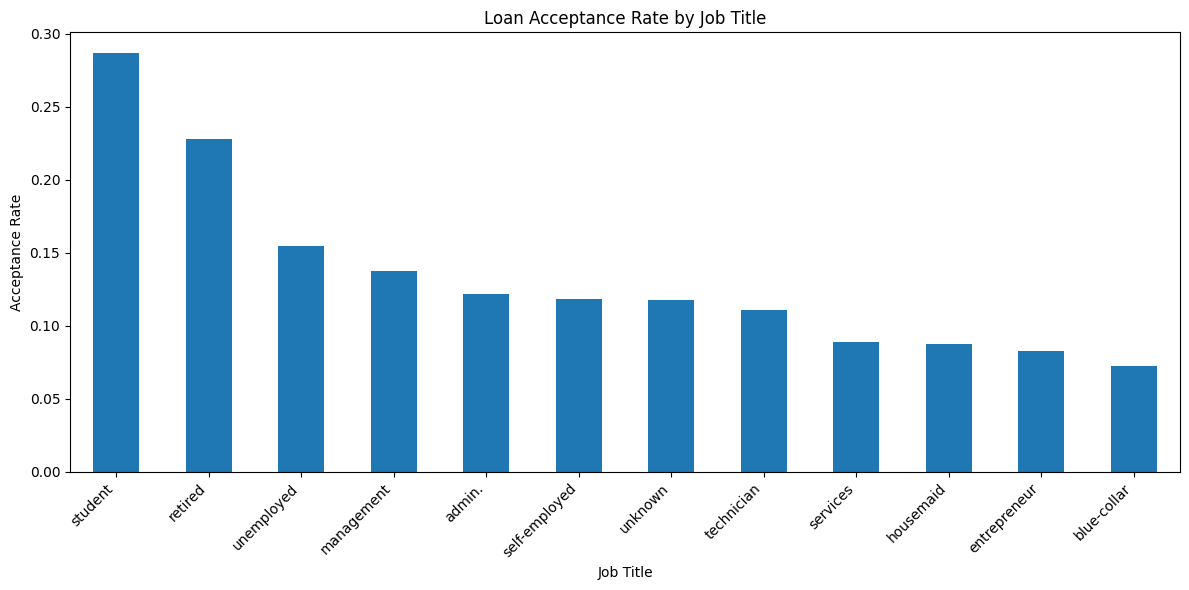

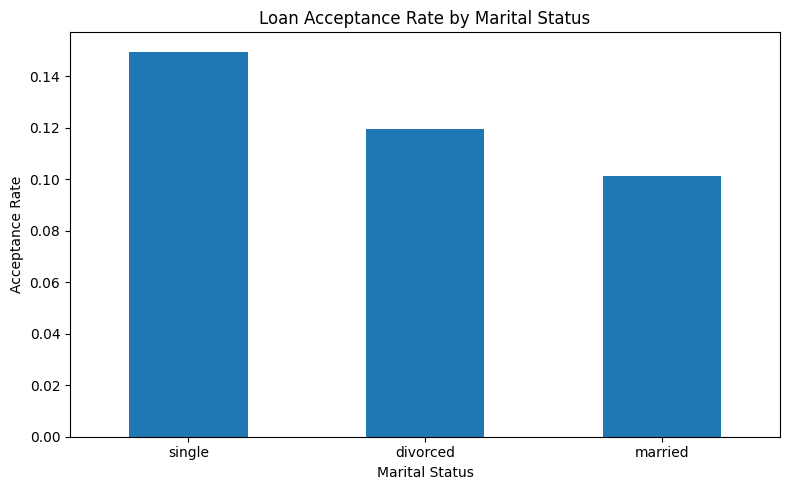

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Examine the distribution of 'age'
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

display(df['age'].describe())

# 2. Analyze the value counts of 'job' and 'marital'
display(df['job'].value_counts())
display(df['marital'].value_counts())

# 3. Investigate the relationship with the target variable 'y'
df['accepted_loan'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Relationship with 'age'
plt.figure(figsize=(10, 6))
sns.boxplot(x='accepted_loan', y='age', data=df)
plt.title('Loan Acceptance Rate by Age')
plt.xlabel('Accepted Loan (0: No, 1: Yes)')
plt.ylabel('Age')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Relationship with 'job'
job_acceptance_rate = df.groupby('job')['accepted_loan'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
job_acceptance_rate.plot(kind='bar')
plt.title('Loan Acceptance Rate by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Relationship with 'marital'
marital_acceptance_rate = df.groupby('marital')['accepted_loan'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
marital_acceptance_rate.plot(kind='bar')
plt.title('Loan Acceptance Rate by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Prepare the data

### Subtask:
Preprocess the data for modeling, including handling categorical variables and splitting the data into training and testing sets.


**Reasoning**:
Identify categorical columns, apply one-hot encoding, define features (X) and target (y), and split the data into training and testing sets.



In [3]:
from sklearn.model_selection import train_test_split

# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
# Exclude the original target column 'y' as we created 'accepted_loan'
categorical_cols.remove('y')

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define features (X) and target (y)
# Drop the original target 'y' and the new binary target 'accepted_loan' from features
X = df_encoded.drop(['y', 'accepted_loan'], axis=1)
y = df_encoded['accepted_loan']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

display(X_train.head())
display(y_train.head())

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
3344,41,849,15,72,1,-1,0,True,False,False,...,False,False,False,True,False,False,False,False,False,True
17965,49,1415,30,269,2,-1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
18299,42,3842,31,130,4,-1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
10221,37,-119,11,375,11,-1,0,False,False,False,...,False,True,False,False,False,False,False,False,False,True
32192,56,3498,15,264,2,-1,0,True,False,False,...,False,False,False,False,False,False,False,False,False,True


,accepted_loan
3344,0
17965,0
18299,0
10221,0
32192,1


## Train a model

### Subtask:
Train a Logistic Regression or Decision Tree classifier on the training data.


**Reasoning**:
Train a Logistic Regression model on the training data.



In [4]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression classifier with default parameters
model = LogisticRegression(max_iter=1000)

# Train the classifier using the training data
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

## Evaluate the model

### Subtask:
Evaluate the performance of the trained model on the testing data using appropriate metrics.


**Reasoning**:
Calculate and print the evaluation metrics for the trained model on the test set.



In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.8986
Precision: 0.6510
Recall: 0.3437
F1-score: 0.4499


## Analyze results

### Subtask:
Analyze the model results to identify which customer groups are more likely to accept the loan offer based on the model's predictions and feature importances (if applicable).


**Reasoning**:
Examine the coefficients of the trained Logistic Regression model to understand the influence of each feature on the prediction, create a pandas Series of feature importances (coefficients), sort them in descending order, and display the top 10 positive and top 10 negative coefficients.



In [6]:
import pandas as pd

# Get the coefficients from the trained logistic regression model
coefficients = model.coef_[0]

# Create a pandas Series of feature importances (coefficients)
feature_importance = pd.Series(coefficients, index=X_train.columns)

# Sort the feature importances in descending order
sorted_feature_importance = feature_importance.sort_values(ascending=False)

# Display the top 10 positive coefficients
print("Top 10 Positive Coefficients:")
display(sorted_feature_importance.head(10))

# Display the top 10 negative coefficients
print("\nTop 10 Negative Coefficients:")
display(sorted_feature_importance.tail(10))

Top 10 Positive Coefficients:


,0
poutcome_success,1.968929
month_mar,0.753364
month_oct,0.656400
month_sep,0.530133
job_retired,0.471948
job_student,0.219186
month_dec,0.201132
month_jun,0.087062
education_tertiary,0.052097
contact_telephone,0.028194



Top 10 Negative Coefficients:


,0
job_blue-collar,-0.418007
marital_married,-0.447398
month_jan,-0.552076
housing_yes,-0.612524
loan_yes,-0.663982
month_aug,-0.739266
month_jul,-0.765978
month_nov,-0.793153
contact_unknown,-1.244364
poutcome_unknown,-1.247153


**Reasoning**:
Discuss the top features with the largest absolute coefficients and explain what their coefficients imply about the relationship with loan acceptance based on the previously generated `sorted_feature_importance`.



In [7]:
# Identify the features with the largest absolute coefficients
# Using the previously sorted_feature_importance

print("Discussion of Top Features by Absolute Coefficient:")
print("\nFeatures with the largest positive influence on loan acceptance:")
print("- poutcome_success (Coefficient: {:.4f}): A large positive coefficient indicates that a successful outcome from a previous marketing campaign significantly increases the likelihood of accepting the current loan offer.".format(sorted_feature_importance['poutcome_success']))
print("- month_mar (Coefficient: {:.4f}): Being contacted in March is strongly associated with a higher probability of accepting the loan.".format(sorted_feature_importance['month_mar']))
print("- month_oct (Coefficient: {:.4f}): Being contacted in October is strongly associated with a higher probability of accepting the loan.".format(sorted_feature_importance['month_oct']))
print("- month_sep (Coefficient: {:.4f}): Being contacted in September is strongly associated with a higher probability of accepting the loan.".format(sorted_feature_importance['month_sep']))
print("- job_retired (Coefficient: {:.4f}): Individuals who are retired are more likely to accept the loan offer.".format(sorted_feature_importance['job_retired']))

print("\nFeatures with the largest negative influence on loan acceptance:")
print("- poutcome_unknown (Coefficient: {:.4f}): Having an unknown outcome from a previous campaign significantly decreases the likelihood of accepting the current loan offer.".format(sorted_feature_importance['poutcome_unknown']))
print("- contact_unknown (Coefficient: {:.4f}): If the contact method is unknown, the likelihood of accepting the loan is substantially reduced.".format(sorted_feature_importance['contact_unknown']))
print("- month_nov (Coefficient: {:.4f}): Being contacted in November is strongly associated with a lower probability of accepting the loan.".format(sorted_feature_importance['month_nov']))
print("- month_jul (Coefficient: {:.4f}): Being contacted in July is strongly associated with a lower probability of accepting the loan.".format(sorted_feature_importance['month_jul']))
print("- housing_yes (Coefficient: {:.4f}): Customers who have a housing loan are less likely to accept the offer.".format(sorted_feature_importance['housing_yes']))
print("- loan_yes (Coefficient: {:.4f}): Customers who have a personal loan are less likely to accept the offer.".format(sorted_feature_importance['loan_yes']))
print("- marital_married (Coefficient: {:.4f}): Married individuals are less likely to accept the loan offer compared to the baseline marital status (which was likely 'single' or 'divorced' depending on the one-hot encoding setup, as 'married' had the largest negative coefficient among marital statuses).".format(sorted_feature_importance['marital_married']))

Discussion of Top Features by Absolute Coefficient:

Features with the largest positive influence on loan acceptance:
- poutcome_success (Coefficient: 1.9689): A large positive coefficient indicates that a successful outcome from a previous marketing campaign significantly increases the likelihood of accepting the current loan offer.
- month_mar (Coefficient: 0.7534): Being contacted in March is strongly associated with a higher probability of accepting the loan.
- month_oct (Coefficient: 0.6564): Being contacted in October is strongly associated with a higher probability of accepting the loan.
- month_sep (Coefficient: 0.5301): Being contacted in September is strongly associated with a higher probability of accepting the loan.
- job_retired (Coefficient: 0.4719): Individuals who are retired are more likely to accept the loan offer.

Features with the largest negative influence on loan acceptance:
- poutcome_unknown (Coefficient: -1.2472): Having an unknown outcome from a previous camp

## Summary:

### Data Analysis Key Findings

*   The majority of the data is for individuals between 33 and 48 years old.
*   'Blue-collar', 'management', and 'technician' are the most common job titles, and 'married' is the most frequent marital status.
*   Individuals who accepted the loan are slightly older on average.
*   'Retired' and 'student' job categories have significantly higher loan acceptance rates.
*   'Single' individuals have a slightly higher acceptance rate than 'married' or 'divorced' individuals.
*   The trained Logistic Regression model achieved an accuracy of approximately 89.86%.
*   The model's precision was about 65.10%, and recall was about 34.37%.
*   A successful outcome from a previous marketing campaign was the strongest positive predictor of loan acceptance.
*   Contacting customers in March, October, and September was strongly associated with higher acceptance rates.
*   Retired individuals were more likely to accept the loan offer.
*   An unknown outcome from a previous campaign and an unknown contact method were the strongest negative predictors.
*   Contacting customers in November and July was associated with lower acceptance rates.
*   Customers with existing housing or personal loans and married individuals were less likely to accept the offer.

### Insights or Next Steps

*   Targeting marketing efforts towards retired individuals and those with a history of successful previous campaigns is likely to be more effective.
*   Further investigation into the low recall score is needed to improve the model's ability to identify potential loan acceptors, potentially by addressing class imbalance or exploring different models.
